子文件夹: 1萎凋不足, 整体平均颜色 (RGB): [ 78.13834581 131.02925189  74.58022517]


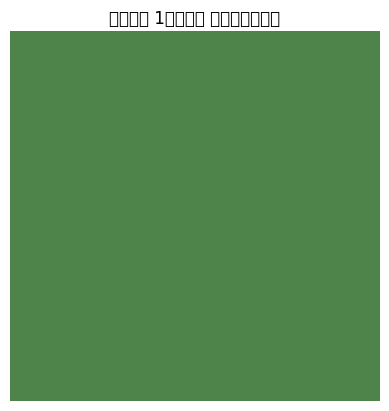

颜色图已保存到: L:\常惠林\萎凋\自然萎凋\原始\1萎凋不足\average_color_1萎凋不足.png
子文件夹: 2萎凋适度, 整体平均颜色 (RGB): [ 71.8603548  119.00290913  68.38931614]


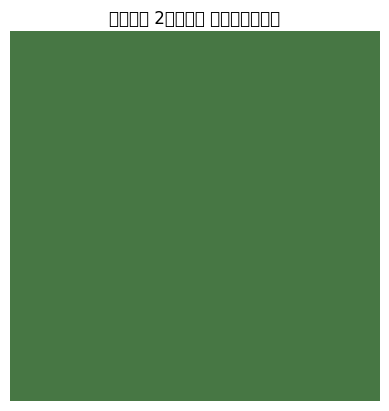

颜色图已保存到: L:\常惠林\萎凋\自然萎凋\原始\2萎凋适度\average_color_2萎凋适度.png
子文件夹: 3萎凋过度, 整体平均颜色 (RGB): [ 73.51316343 120.61917021  70.28011048]


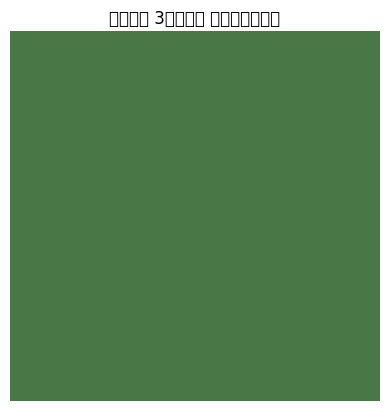

颜色图已保存到: L:\常惠林\萎凋\自然萎凋\原始\3萎凋过度\average_color_3萎凋过度.png


c:\Users\enine\anaconda3\envs\changhl\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20266 (\N{CJK UNIFIED IDEOGRAPH-4F2A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\enine\anaconda3\envs\changhl\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24425 (\N{CJK UNIFIED IDEOGRAPH-5F69}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\enine\anaconda3\envs\changhl\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21487 (\N{CJK UNIFIED IDEOGRAPH-53EF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\enine\anaconda3\envs\changhl\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35270 (\N{CJK UNIFIED IDEOGRAPH-89C6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\enine\anaconda3\envs\changhl\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21270

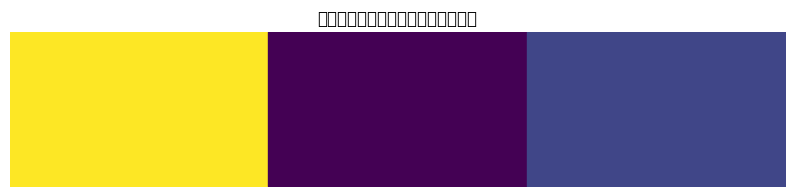

伪彩色图已保存到: L:\常惠林\萎凋\自然萎凋\原始\pseudo_color_visualization.png


<Figure size 640x480 with 0 Axes>

In [9]:
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

# 定义根文件夹路径
root_folder = r"L:\常惠林\萎凋\自然萎凋\原始"

# 获取根文件夹下的所有子文件夹
sub_folders = [f for f in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, f))]

# 检查是否有子文件夹
if not sub_folders:
    print("根文件夹中没有子文件夹。")
else:
    # 存储每个子文件夹的整体平均颜色
    average_colors = []

    # 遍历每个子文件夹
    for sub_folder in sub_folders:
        # 子文件夹的完整路径
        folder_path = os.path.join(root_folder, sub_folder)

        # 获取子文件夹中的所有图像文件
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('.bmp', '.jpg', '.png', '.jpeg'))]

        # 检查是否有图像文件
        if not image_files:
            print(f"子文件夹 {sub_folder} 中没有图像文件。")
            continue

        # 存储所有图像的像素值
        all_pixels = []

        # 遍历每张图像
        for image_file in image_files:
            # 读取图像
            image_path = os.path.join(folder_path, image_file)
            try:
                # 使用 PIL 读取图像
                image = Image.open(image_path)
                image = np.array(image)  # 转换为 NumPy 数组

                # 检查图像是否为空
                if image.size == 0:
                    print(f"无法加载图像: {image_file}")
                    continue

                # 将图像的像素值添加到 all_pixels 中
                all_pixels.append(image)

            except Exception as e:
                print(f"无法加载图像: {image_file}, 错误: {e}")
                continue

        # 如果读取到图像，计算整体平均颜色
        if all_pixels:
            # 将所有图像的像素值合并
            all_pixels = np.concatenate([pixels.reshape(-1, 3) for pixels in all_pixels], axis=0)

            # 计算整体平均颜色（RGB格式）
            average_color = np.mean(all_pixels, axis=0)
            average_colors.append(average_color)

            # 打印整体平均颜色
            print(f"子文件夹: {sub_folder}, 整体平均颜色 (RGB): {average_color}")

            # 生成颜色图
            color_map = np.zeros((100, 100, 3), dtype=np.uint8)
            color_map[:, :, :] = average_color  # 填充平均颜色

            # 显示颜色图
            plt.imshow(color_map)
            plt.axis('off')  # 关闭坐标轴
            plt.title(f"子文件夹 {sub_folder} 的整体平均颜色")
            plt.show()

            # 保存颜色图
            output_path = os.path.join(folder_path, f"average_color_{sub_folder}.png")
            Image.fromarray(color_map).save(output_path)
            print(f"颜色图已保存到: {output_path}")
        else:
            print(f"子文件夹 {sub_folder} 没有读取到任何图像。")

    # 对所有子文件夹的整体平均颜色进行伪彩色可视化
    if average_colors:
        # 将平均颜色转换为灰度值（用于伪彩色映射）
        gray_values = np.mean(average_colors, axis=1)  # 取 RGB 的平均值作为灰度值

        # 创建伪彩色映射（例如热力图）
        colormap = plt.get_cmap('viridis')  # 可以使用其他 colormap，如 'plasma', 'inferno', 'magma', 'cividis'
        normalized_values = (gray_values - np.min(gray_values)) / (np.max(gray_values) - np.min(gray_values))  # 归一化
        pseudo_colors = colormap(normalized_values)

        # 显示伪彩色图
        plt.figure(figsize=(10, 2))
        for i, color in enumerate(pseudo_colors):
            plt.fill_between([i, i + 1], [0, 0], [1, 1], color=color)
        plt.xlim(0, len(sub_folders))
        plt.ylim(0, 1)
        plt.axis('off')
        plt.title("伪彩色可视化（基于整体平均颜色）")
        plt.show()

        # 保存伪彩色图
        output_path = os.path.join(root_folder, "pseudo_color_visualization.png")
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
        print(f"伪彩色图已保存到: {output_path}")